In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family="Malgun Gothic")

In [2]:
df = pd.read_csv('rawdata_project_1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
Unnamed: 0    7960 non-null float64
name          8000 non-null object
price         8000 non-null int64
brand         5678 non-null object
cate_3        8000 non-null object
cate_4        7691 non-null object
review        8000 non-null int64
date          8000 non-null int64
tag           3000 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 562.6+ KB


In [4]:
df = df.drop(["Unnamed: 0"], axis=1)

In [5]:
#name에서 "모음"이라는 문자열을 포함하고 있고(모음전도 모음을 포함하고 있기 때문에 함께 해당됩니다)
#동시에 cate_4가 NaN값인 row들을 선택하여
#하나의 데이터 프레임(filter_list_1)으로 만들었습니다. 총 16개 row가 해당됩니다 
filter_list_1 = df[(df["name"].str.contains("모음")) & (df["cate_4"].isna())]
len(filter_list_1)

16

In [6]:
#위에서 만든 filter_list_1은 기존 df의 인덱스값을 그대로 유지하고 있습니다 (reset_index를 하지 않았기 때문에)
#이에 df의 인덱스가 filter_list_1의 인덱스에 없는(isin -> False) 경우만 남기는 코드를 작성하여 
#새로운 데이터 프레임인 pre_df를 만들었습니다 
pre_df = df[df.index.isin(filter_list_1.index) == False]
pre_df.info() #전체 8000개중 16개를 빼고 7984개가 남았습니다 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7984 entries, 0 to 7999
Data columns (total 8 columns):
name      7984 non-null object
price     7984 non-null int64
brand     5671 non-null object
cate_3    7984 non-null object
cate_4    7691 non-null object
review    7984 non-null int64
date      7984 non-null int64
tag       2997 non-null object
dtypes: int64(3), object(5)
memory usage: 561.4+ KB


In [7]:
#잘 필터링된 것을 확인할 수 있습니다 
pre_df[(pre_df["name"].str.contains("모음")) & pre_df["cate_4"].isna()]

,name,price,brand,cate_3,cate_4,review,date,tag


In [8]:
#"특별전", "모아보기", "방송 주문", "총집합" 등은 "모음"으로 걸러내지지 않았습니다 
#"BEST"는 확인한 결과 "BEST 식품 한자리에" < 이런 식이어서, 모음전과 같은 성격이었습니다 
#그리고 영양제가 아닌데도 이 카테고리로 등록된 아이템들이 있습니다 (ex : 소이 소스, 베지볼) 
#이에 몇가지 필터를 더 적용해봅니다 
#15개나 되니까 concat을 통해 리스트를 합쳤습니다
#그리고 다시 인덱스값으로 걸러냅니다 
filter_list_2 = pre_df[(pre_df["name"].str.contains("특별전")) & pre_df["cate_4"].isna()]
filter_list_3 = pre_df[(pre_df["name"].str.contains("모아")) & pre_df["cate_4"].isna()]
filter_list_4 = pre_df[(pre_df["name"].str.contains("방송")) & pre_df["cate_4"].isna()]
filter_list_5 = pre_df[(pre_df["name"].str.contains("총집합")) & pre_df["cate_4"].isna()]
filter_list_6 = pre_df[(pre_df["name"].str.contains("BEST")) & pre_df["cate_4"].isna()]
filter_list_7 = pre_df[(pre_df["name"].str.contains("일반")) & pre_df["cate_4"].isna()]
filter_list_8 = pre_df[(pre_df["name"].str.contains("外")) & pre_df["cate_4"].isna()]
filter_list_9 = pre_df[(pre_df["name"].str.contains("김나운더키친")) & pre_df["cate_4"].isna()]
filter_list_10 = pre_df[(pre_df["name"].str.contains("내일의딜")) & pre_df["cate_4"].isna()]
filter_list_11 = pre_df[(pre_df["name"].str.contains("추석맞이")) & pre_df["cate_4"].isna()]
filter_list_12 = pre_df[(pre_df["name"].str.contains("방송상품")) & pre_df["cate_4"].isna()]
filter_list_13 = pre_df[(pre_df["name"].str.contains("Pure Vanilla Extract")) & pre_df["cate_4"].isna()]
filter_list_14 = pre_df[(pre_df["name"].str.contains("프릴라이즈")) & pre_df["cate_4"].isna()]
filter_list_15 = pre_df[(pre_df["name"].str.contains("이노센트 베지볼")) & pre_df["cate_4"].isna()]
filter_list_16 = pre_df[(pre_df["name"].str.contains("소이 소스 얼터너티브")) & pre_df["cate_4"].isna()]


filter_list = pd.concat((filter_list_2, filter_list_3, filter_list_4, filter_list_5, filter_list_6,
                        filter_list_7, filter_list_8, filter_list_9, filter_list_10, filter_list_11, 
                        filter_list_12, filter_list_13, filter_list_14, filter_list_15, filter_list_16), axis=0)





pre_df = pre_df[pre_df.index.isin(filter_list.index) == False]
pre_df.info() #전체 7984개중 필터를 적용한 결과 7960개가 남았습니다 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7960 entries, 0 to 7999
Data columns (total 8 columns):
name      7960 non-null object
price     7960 non-null int64
brand     5657 non-null object
cate_3    7960 non-null object
cate_4    7691 non-null object
review    7960 non-null int64
date      7960 non-null int64
tag       2996 non-null object
dtypes: int64(3), object(5)
memory usage: 559.7+ KB


In [9]:
#여기까지 처리해놓고 cate_3을 확인하였습니다. 
pre_df[pre_df["cate_4"].isna()]["cate_3"].unique()


array(['영양제', '홍삼', '건강분말', '건강음료', '건강환/정', '꿀'], dtype=object)


- 영양제를 제외한 홍삼, 건강분말, 건강음료, 건강환/정, 꿀은 네이버 쇼핑에서 확인해본 결과 하위 카테고리(cate_4) 자체가 없었습니다. 즉 cate_3이 가장 하위 카테고리 입니다
- 이에 영양제를 제외하고는 cate_3 = cate_4로 처리하기로 합니다 

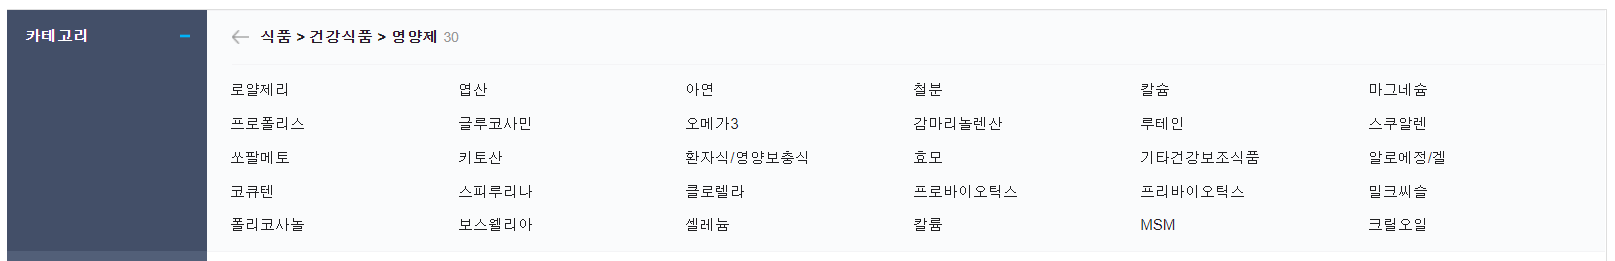
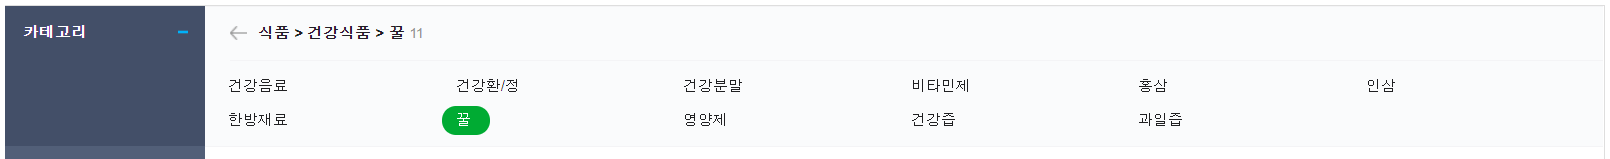

In [10]:
#cate_3이 꿀인 경우 cate_4도 꿀, cate_3이 홍삼인 경우 cate_4도 홍삼으로 처리합니다 
pre_df.loc[pre_df["cate_3"] == "꿀","cate_4"] = "꿀"
pre_df.loc[pre_df["cate_3"] == "홍삼","cate_4"] = "홍삼"
pre_df.loc[pre_df["cate_3"] == "건강분말","cate_4"] = "건강분말"
pre_df.loc[pre_df["cate_3"] == "건강환/정","cate_4"] = "건강환/정"
pre_df.loc[pre_df["cate_3"] == "건강음료","cate_4"] = "건강음료"
pre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7960 entries, 0 to 7999
Data columns (total 8 columns):
name      7960 non-null object
price     7960 non-null int64
brand     5657 non-null object
cate_3    7960 non-null object
cate_4    7736 non-null object
review    7960 non-null int64
date      7960 non-null int64
tag       2996 non-null object
dtypes: int64(3), object(5)
memory usage: 559.7+ KB


In [11]:
#위 과정을 거친후에도 cate_4가 Nan인 경우를 필터링합니다 
cate_4_null_filter = pre_df[pre_df["cate_4"].isna()]
cate_4_null_filter

,name,price,brand,cate_3,cate_4,review,date,tag
10,"프리미엄 크릴오일 추천, 오메가3 인지질 아스타잔틴, 지방 분해 효과",43000,NaN,영양제,NaN,73378,20210324,NaN
11,"프리미엄 크릴오일 추천, 오메가3 인지질 아스타잔틴, 지방 분해 효과",43000,NaN,영양제,NaN,73378,20210325,NaN
96,"나우푸드 Now Foods Molecularly Distilled Omega-3, ...",6361,NaN,영양제,NaN,31030,20201231,NaN
103,"뉴트리바이오틱 NutriBiotic Immunity, 아스코르브산 나트륨, 결정질 ...",43600,NaN,영양제,NaN,30030,20201105,NaN
107,면역 건강 내몸 챙기기! 낙지/콜라겐/유산균/관절/홍삼,64080,NaN,영양제,NaN,29290,20210217,NaN
114,프리미엄 남극 블루오션 크릴오일 오메가3 인지질 추천 효능,33900,NaN,영양제,NaN,28443,20210312,크릴오일
146,"나우푸드 Now Foods High Potency Vitamin D-3, 10,00...",20100,NaN,영양제,NaN,22721,20210210,NaN
459,"나우푸드 Now Foods 아담, 슈피리어 남성용 멀티, 소프트젤 180정",40218,NaN,영양제,NaN,11113,20200712,NaN
587,"닥터스 베스트 Doctor’s Best BioPerine 함유 고흡수 CoQ10, ...",19880,NaN,영양제,NaN,8749,20200716,NaN
663,"나우푸드 Now Foods C-1000, 100정",8708,NaN,영양제,NaN,7586,20201008,NaN


In [12]:
#혹시 모르니까 새 변수로 copy 실행 
mytest = cate_4_null_filter.copy()
mytest

,name,price,brand,cate_3,cate_4,review,date,tag
10,"프리미엄 크릴오일 추천, 오메가3 인지질 아스타잔틴, 지방 분해 효과",43000,NaN,영양제,NaN,73378,20210324,NaN
11,"프리미엄 크릴오일 추천, 오메가3 인지질 아스타잔틴, 지방 분해 효과",43000,NaN,영양제,NaN,73378,20210325,NaN
96,"나우푸드 Now Foods Molecularly Distilled Omega-3, ...",6361,NaN,영양제,NaN,31030,20201231,NaN
103,"뉴트리바이오틱 NutriBiotic Immunity, 아스코르브산 나트륨, 결정질 ...",43600,NaN,영양제,NaN,30030,20201105,NaN
107,면역 건강 내몸 챙기기! 낙지/콜라겐/유산균/관절/홍삼,64080,NaN,영양제,NaN,29290,20210217,NaN
114,프리미엄 남극 블루오션 크릴오일 오메가3 인지질 추천 효능,33900,NaN,영양제,NaN,28443,20210312,크릴오일
146,"나우푸드 Now Foods High Potency Vitamin D-3, 10,00...",20100,NaN,영양제,NaN,22721,20210210,NaN
459,"나우푸드 Now Foods 아담, 슈피리어 남성용 멀티, 소프트젤 180정",40218,NaN,영양제,NaN,11113,20200712,NaN
587,"닥터스 베스트 Doctor’s Best BioPerine 함유 고흡수 CoQ10, ...",19880,NaN,영양제,NaN,8749,20200716,NaN
663,"나우푸드 Now Foods C-1000, 100정",8708,NaN,영양제,NaN,7586,20201008,NaN


In [13]:
#NaN값 분류를 위한 제목 키워드 처리 ㅠ

probiotics = ["Probiotics", "AMD"]
multi = ["종합비타민", "종합 비타민", "Way", "Woman","잘크톤", "비거록스", "오쏘몰", "유기농마을 밸런스 31"]
omega = ["Omega-3", "생선 오일", "오메가-"]
vit_c = ["에스터-C", "Vitamin C", "C-1000", "C3", "Ascorbate","비타민C", "비타민 C", "Ester C", "Ester-C", \
         "아스코르브산", "에스테르-C"]
etc = ["임상 강도 전립선 건강", "위트 그라스", "올리브 잎", "항산화제", "리봄순액", "아슈와간다", "Bone-Up", \
       "사카로미세스 보울라디", "세라펩타아제", "기관지", "부비강", "차일드라이프", "로디올라", "마카", "Maxi-Hair",\
       "카르노신", "콜라겐", "칸디다", "슈피리어", "이소플라본", "오레가노", "글루코만난", "신장", "베타카로틴",\
       "요오드", "마늘", "녹용", "울금", "Elderberry", "Enzyme",  "LipoMicel", "Pau", "BetaCareAll",\
       "베타인", "AstaLif", "Biloba", "Bioperine", "BioPerine", "Choline", "Curcumin", "D'Arco", "EMIQ", \
       "Enzymedica", "Fo-Ti", "Fungi", "Inulin", "Kyolic", "L-라이신", "L-시스테인", "티로신", "Lecithin", \
       "Quercetin", "Oligopin", "올리고핀", "Oscillococcinum", "PQQ", "딱총", "SAMe", "강황", "Whole", "Y.S.",\
       "Zand", "Wu","Foods Cat", "On-The-Go", "쐐기풀", "효소", "글라이신","BetaCareAll", "포도씨", "Grape Seed",\
       "Wobenzyme", "Wobenzym", "Wellmune", "퀘르세틴", "알파리포산","징코", "엘더베리", "릴랙스", "사프란",\
       "월야", "Effer-Hydrate", "오로테이트", "대구 간유", "아스타잔틴", "엔짐", "산자나무", "위타 그라스", "유기농 단백질"]
prebiotics = ["Prebiotic"]
mag = ["Magnesium", "마그네슘", "조이스텝"]
metafolin = ["Metafolin", "Quatrefolic"]
coq = ["CoQ-10", "CoQ10", "유비퀴놀"]
iron = ["Iron", "철분", "철"]
hefe = ["효모", "헤페", "베타글루칸"]
vit_b = ["B 복합체", "Vitamin", "Vitamin B", "B-Complex", "B-복합체", "B-콤플렉스", "B2", "B-12", "Benfotiamine", "스트레스 B"]
vit_d = ["D-3"]
zinc = ["Zinc", "L-OptiZinc", "징크", "옵티진스", "킬레이트화 아연"]
vit_a = ["Vitamin A", "비타민A", "비타민 A"]
vit_etc = ["K2", "Primrose"]
honey = ["Bee", "Honey", "Wedderspoon"]
kril = ["크릴오일"]
milk = ["Liver", "실리마린"]
jelly = ["로열젤리", "로얄제리"]
lutein = ["트루아이"]
vit_e = ["E-400"]
kal = ["구연산", "구연산칼륨"]
msm = ["MSM 분말"]
biotin = ["바이오틴", "비오틴"]
var_list = [probiotics, multi, omega, vit_c, etc, prebiotics, mag, metafolin, coq, iron, hefe, vit_b, vit_d, \
           zinc, vit_a, vit_etc, honey, kril, milk, jelly, lutein, vit_e, kal, msm, biotin]
names_list = ["프로바이오틱스", "멀티비타민", "오메가3", "비타민C", "기타건강보조식품", "프리바이오틱스", \
             "마그네슘", "엽산", "코큐텐", "철분", "효모", "비타민B", "비타민D","아연", "비타민A", "기타비타민",\
              "꿀", "크릴오일", "밀크씨슬", "로얄제리", "루테인", "비타민E", "칼륨", "MSM", "비오틴"]

In [14]:
# name 안에 위 리스트의 값들이 있는 경우 cate_4 지정 

for num, var in enumerate(var_list) : 
    for i in var : 
        x = mytest[mytest["name"].str.contains(i)].index
        mytest.loc[x, "cate_4"] = names_list[num]

In [15]:
# mytest[mytest["cate_4"].isna()].to_csv("./data/nanlist.csv", encoding = "utf-8-sig")

In [16]:
# 단어 검색용 코드 
# pre_df[pre_df["name"].str.contains("사프란")]

In [17]:
#isna가 없는 것을 확인 !! 
mytest[mytest["cate_4"].isna()]

,name,price,brand,cate_3,cate_4,review,date,tag


In [18]:
#mytest 정보 한번 확인

mytest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 10 to 7993
Data columns (total 8 columns):
name      224 non-null object
price     224 non-null int64
brand     15 non-null object
cate_3    224 non-null object
cate_4    224 non-null object
review    224 non-null int64
date      224 non-null int64
tag       16 non-null object
dtypes: int64(3), object(5)
memory usage: 25.8+ KB


In [19]:
#pre_df에서 "mytest에 인덱스가 없는" row들(=cate_4가 Nan이 아닌 row들)만 남깁니다 
pre_df = pre_df[pre_df.index.isin(mytest.index) == False]
pre_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 7999
Data columns (total 8 columns):
name      7736 non-null object
price     7736 non-null int64
brand     5642 non-null object
cate_3    7736 non-null object
cate_4    7736 non-null object
review    7736 non-null int64
date      7736 non-null int64
tag       2980 non-null object
dtypes: int64(3), object(5)
memory usage: 543.9+ KB


In [20]:
#그러고 나서 pre_df와 mytest를 합쳐서 전처리가 완료된 데이터 프레임을 생성합니다 
result_df = pd.concat([pre_df, mytest], axis = 0)

In [21]:
result_df.info() #숫자가 7960개로 앞서 pre_df의 숫자와 동일합니다 전처리 끝 ! 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7960 entries, 0 to 7993
Data columns (total 8 columns):
name      7960 non-null object
price     7960 non-null int64
brand     5657 non-null object
cate_3    7960 non-null object
cate_4    7960 non-null object
review    7960 non-null int64
date      7960 non-null int64
tag       2996 non-null object
dtypes: int64(3), object(5)
memory usage: 559.7+ KB


In [22]:
# 영양성분 순위표 (등록 제품 순 )

rank_register = pd.DataFrame(result_df[["cate_4"]])
rank_register["count"] = 1
register_group = rank_register.groupby(by = "cate_4").count().sort_values(by = "count", ascending = True ).reset_index()
register_group

,cate_4,count
0,석류즙,1
1,헛개나무,1
2,기타건강즙,2
3,비타민E,2
4,스쿠알렌,3
5,꿀,3
6,기타비타민,4
7,비타민A,5
8,건강음료,8
9,건강환/정,9


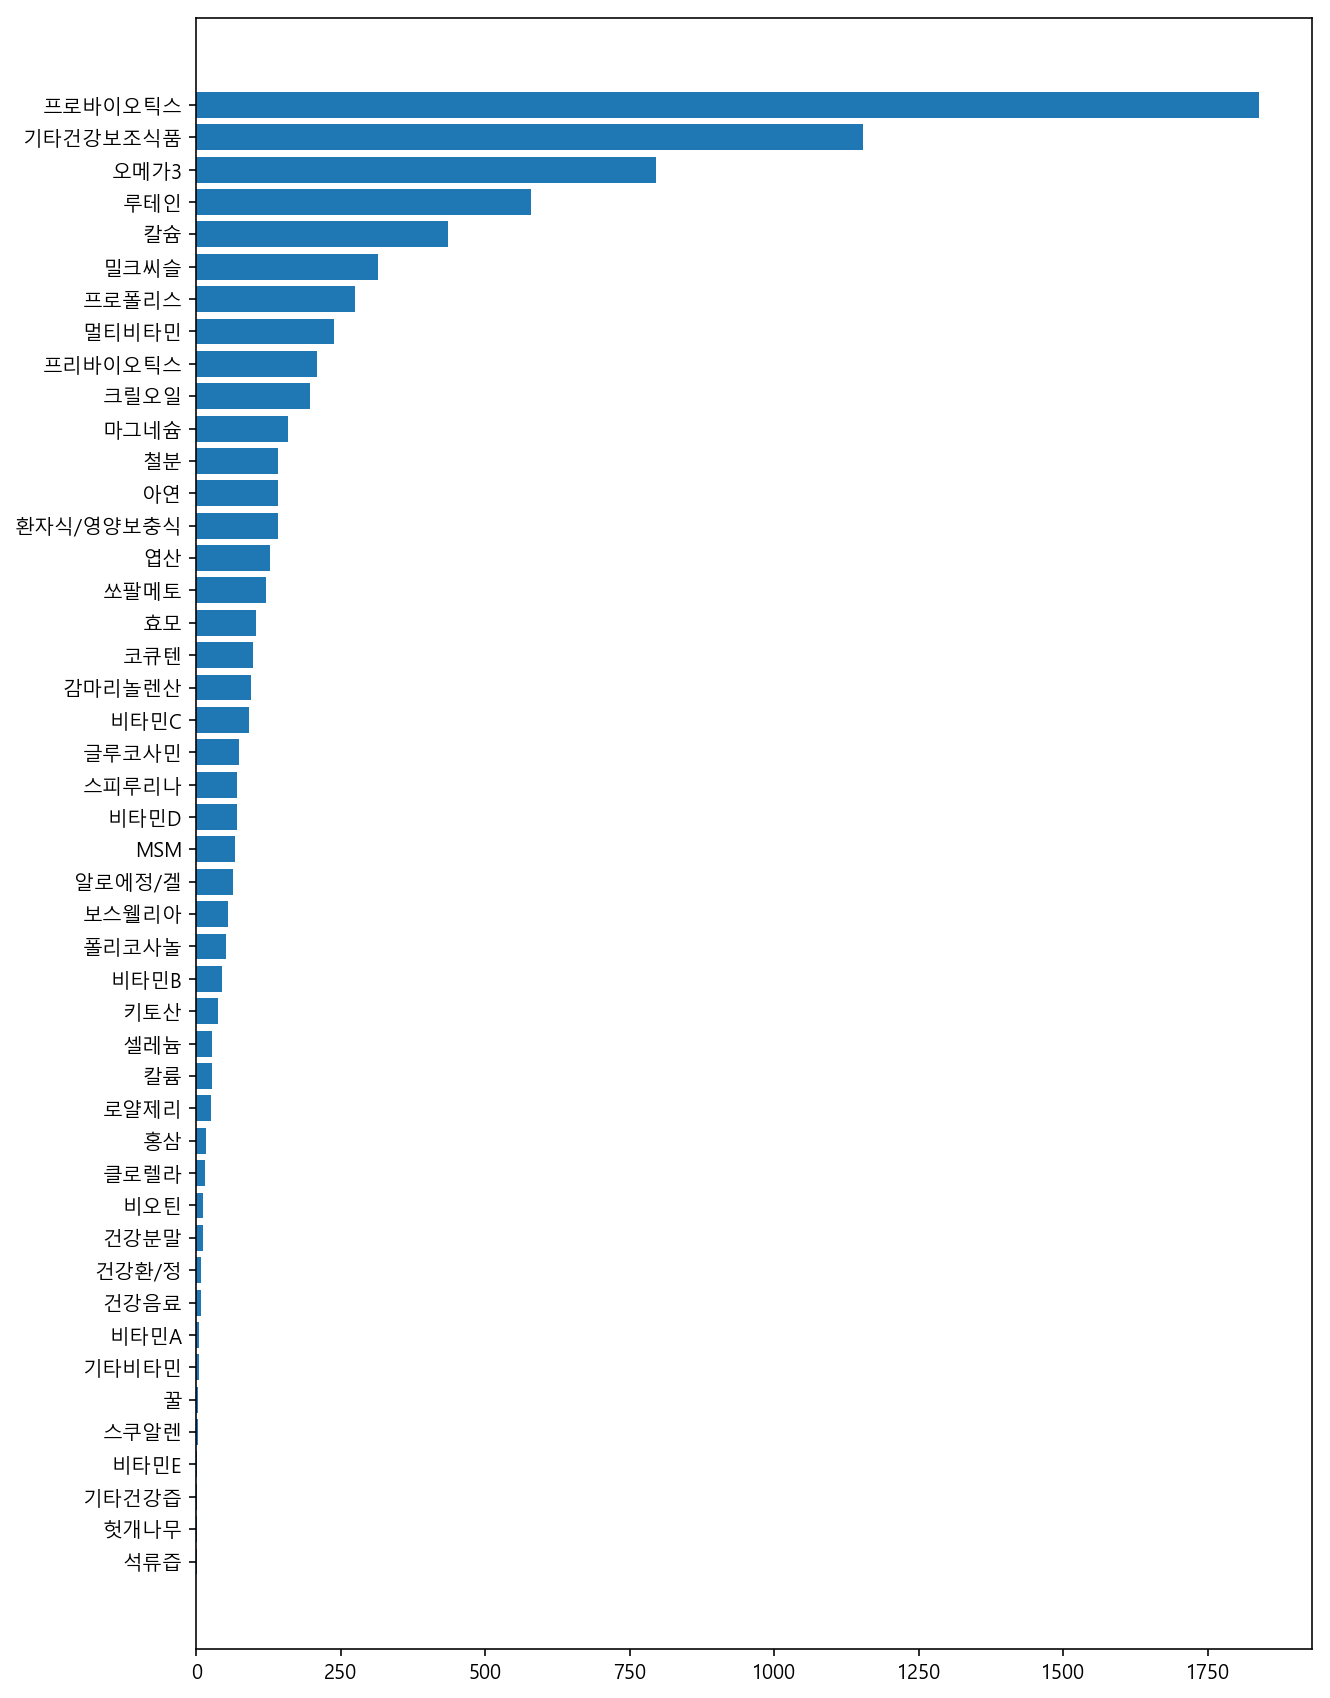

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

plt.figure(figsize = (10, 15))
x = register_group["cate_4"]

values = register_group["count"]

plt.barh(x, values)
plt.yticks(x, register_group["cate_4"])
plt.show()

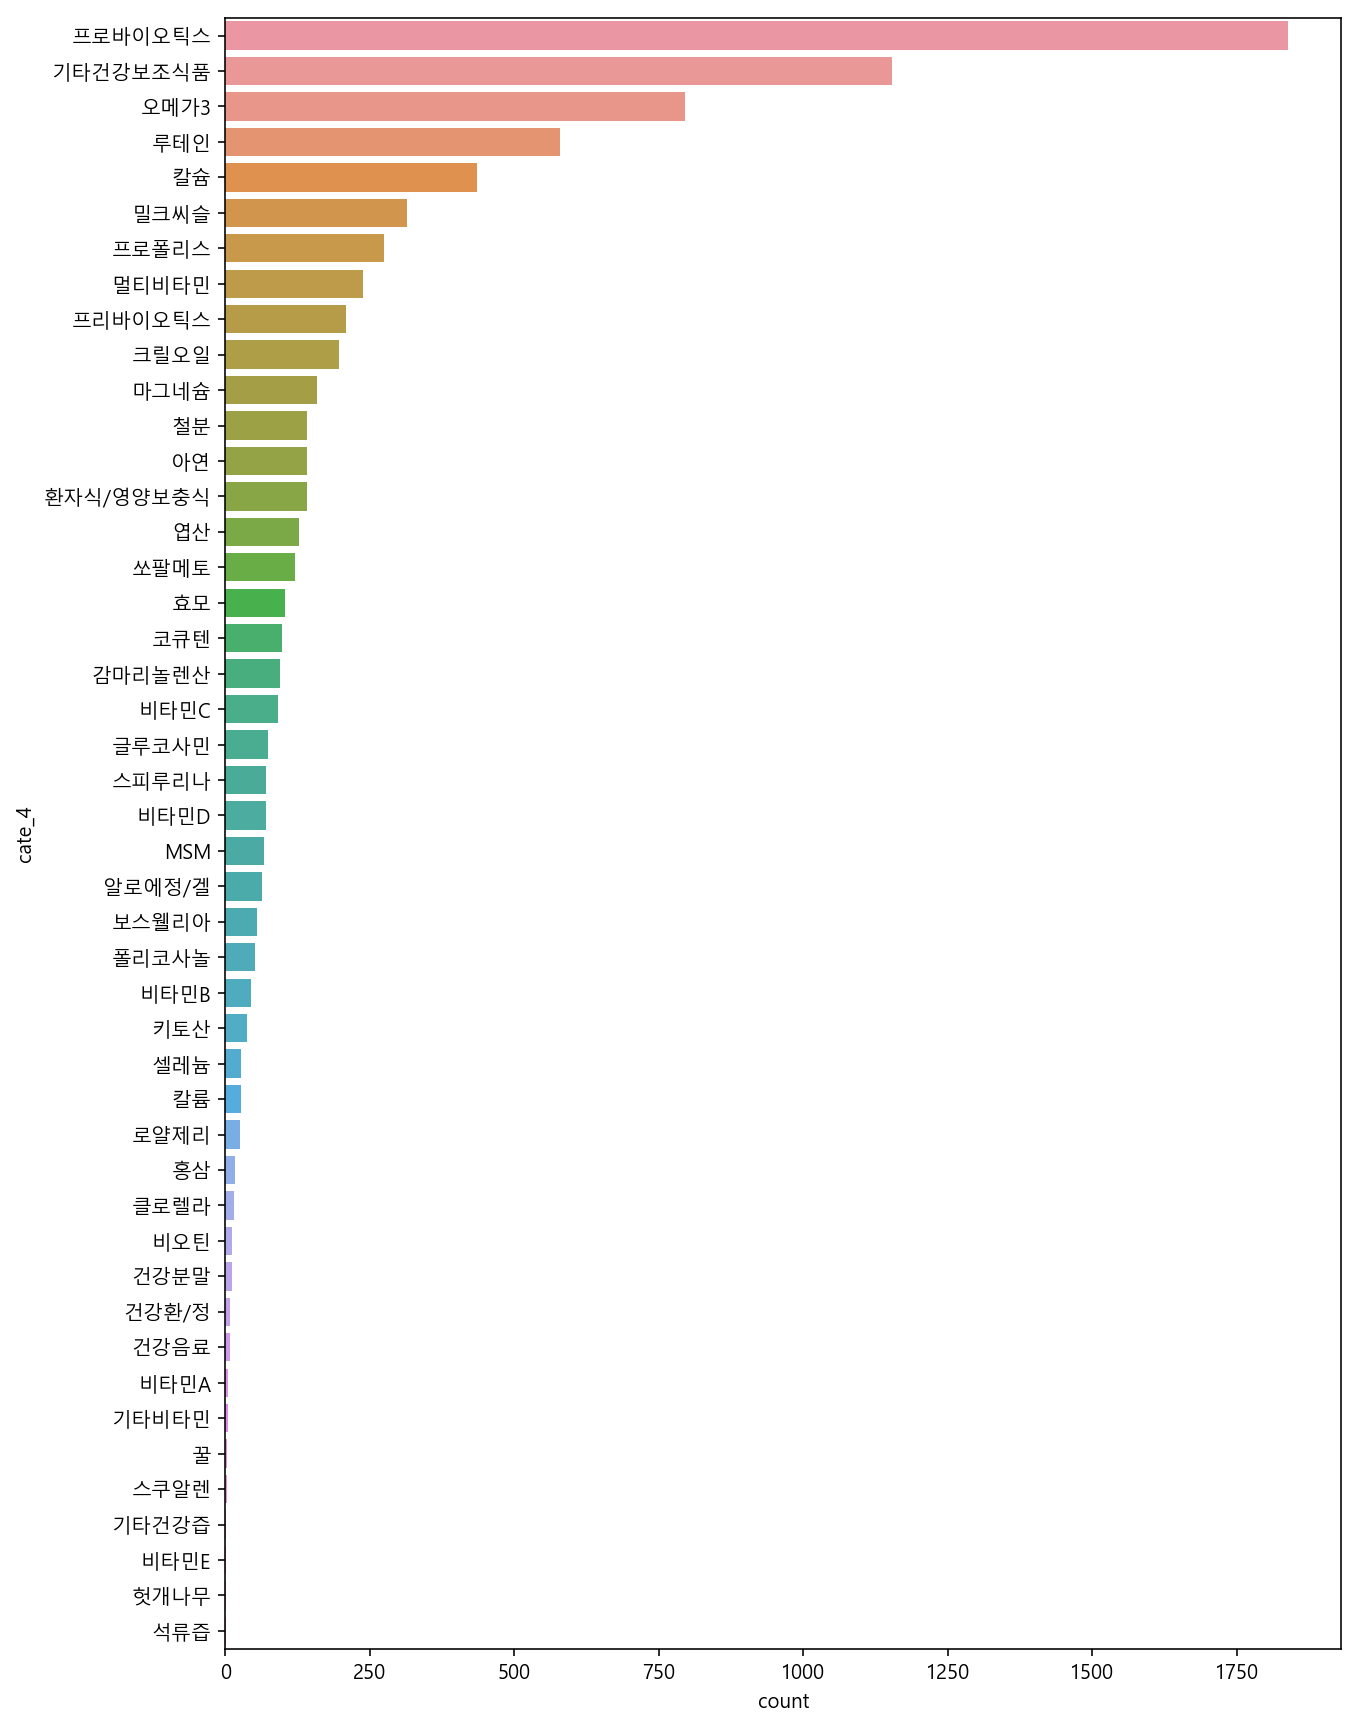

In [24]:
plt.figure(figsize = (10,15))
sns.countplot(y = 'cate_4', data = result_df, order = register_group.sort_values(by = "count", ascending = False)["cate_4"])

plt.show()

In [25]:
# 영양성분 순위표 (리뷰 순 )

rank_review = pd.DataFrame(result_df[["cate_4", "review"]])
review_group = rank_review.groupby(by = "cate_4").sum().sort_values(by = "review", ascending = True).reset_index()


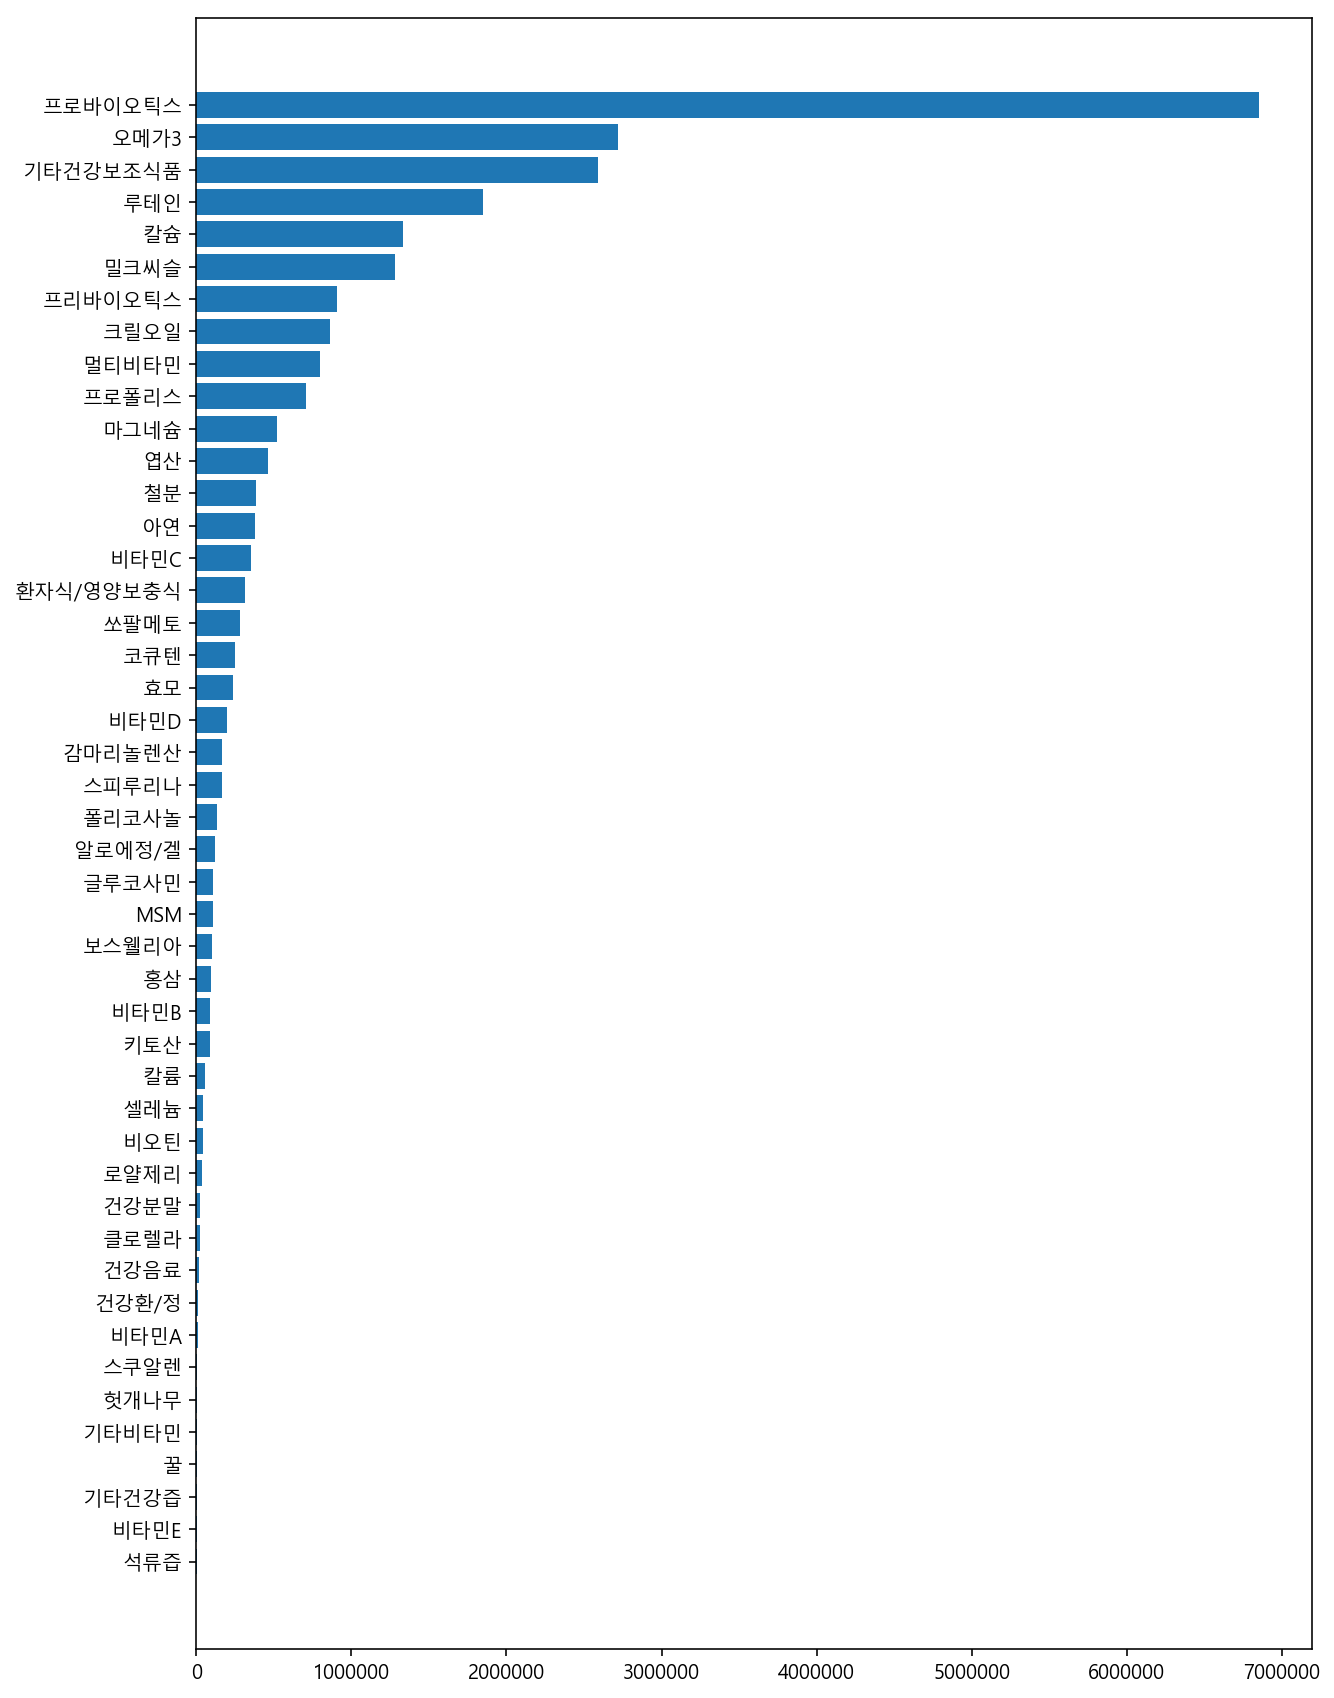

In [26]:
plt.figure(figsize = (10, 15))
x = review_group["cate_4"]

values = review_group["review"]

plt.barh(x, values)
plt.yticks(x, review_group["cate_4"])
plt.show()

In [27]:
df_1 =pd.DataFrame(register_group["cate_4"][::-1]).reset_index(drop=True)
df_1["count_rank"] = range( 1 , len(df_1)+1) #순위 넣어보기 


In [28]:
df_2 = pd.DataFrame(review_group["cate_4"][::-1].reset_index(drop = True))
df_2["review_rank"] = range( 1 , len(df_2)+1) #순위 넣어보기 


In [29]:
result_merge = pd.merge(df_1, df_2, on = "cate_4")

In [30]:
result_merge

,cate_4,count_rank,review_rank
0,프로바이오틱스,1,1
1,기타건강보조식품,2,3
2,오메가3,3,2
3,루테인,4,4
4,칼슘,5,5
5,밀크씨슬,6,6
6,프로폴리스,7,10
7,멀티비타민,8,9
8,프리바이오틱스,9,7
9,크릴오일,10,8


In [31]:
# result_df[result_df["cate_4"] == "기타건강보조식품"].to_csv("etc.csv", encoding = "utf-8-sig")

In [32]:
# 앞으로 raw데이터에서 추가작업해야 하는 부분(메모) 
#김나운더키친,양송이 스프, 동서 제티 초코, [촉촉닭] 불고기 닭스테이크 3kg -> raw 데이터 제외할 것 
# 코큐텐인데 기타로 가 있는 것들이 좀 있음(raw 데이터에서 cate_4 코큐텐으로 바꾸기)

In [33]:
etc_df = result_df[result_df["cate_4"] == "기타건강보조식품"]
etc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 23 to 7889
Data columns (total 8 columns):
name      1154 non-null object
price     1154 non-null int64
brand     458 non-null object
cate_3    1154 non-null object
cate_4    1154 non-null object
review    1154 non-null int64
date      1154 non-null int64
tag       347 non-null object
dtypes: int64(3), object(5)
memory usage: 81.1+ KB


In [53]:
#기타건강식품의 세부 분류를 위한 단어 리스트 
enzyme = ["효소", "엔짐", "Enzyme"]
ginko = ["은행", "징코", "깅코", "Ginko"]
mussel = ["홍합"]
colostrum = ["초유"]
deer = ["녹용", "녹혈"]
arginine = ["아르기닌", "arginine", "Arginine"]
citric = ["구연산"]
polyphenol = ["폴리페놀", "Polyphenol", "polyphenol"]
garlic = ["마늘", "교릭"]
pome = ["석류"]
carotene = ["베타카로틴", "카로틴"]
iodine = ["요오드", "아이오딘"]
sleep = ["릴랙스", "수면", "슬립"]
berry = ["엘더베리", "Elderberry"]
quercetin = ["퀘르세틴", "Quercetin", "쿼세틴"]
aminoacid = ["L-라이신", "L-시스테인", "티로신","카르노신", "글라이신"]
herb = ["포도씨", "강황", "울금", "쐐기풀", "딱총", "위트그라스", "위트 그라스", "Claw", "올리브 잎", "오레가노",
       "올리고핀", "해송", "Oligopin", "Grape Seed"]
hcl = ["베타인 HCL"]


var_list_2 = [enzyme, ginko, mussel, colostrum, deer, arginine, citric, polyphenol, garlic, pome,
             carotene, iodine, sleep, berry, quercetin, aminoacid, herb, hcl]
names_list_2 = ["효소", "은행추출물", "초록입홍합", "초유단백질", "녹용/녹혈", "아르기닌(아미노산)", "구연산", \
                "폴리페놀", "마늘", "석류추출물", "베타카로틴", "요오드", "수면보조제","엘더베리", "퀘르세틴", \
                "아미노산", "기타식물추출물", "베타인 HCL" ]

In [54]:
#cate_5로 지정 
for num, var in enumerate(var_list_2) :
    for i in var :
        x = etc_df[etc_df["name"].str.contains(i)].index
        etc_df.loc[x, "cate_5"] = names_list_2[num]

In [55]:
etc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 23 to 7889
Data columns (total 9 columns):
name      1154 non-null object
price     1154 non-null int64
brand     458 non-null object
cate_3    1154 non-null object
cate_4    1154 non-null object
review    1154 non-null int64
date      1154 non-null int64
tag       347 non-null object
cate_5    424 non-null object
dtypes: int64(3), object(6)
memory usage: 130.2+ KB


In [65]:
etc_df[["name", "cate_5"]].groupby("cate_5").count()
#기타로만 분류되어있는 것들을 세부적으로 보면 
#초유단백질, 초록입홍합 등이 생각보다 많은 비중을 차지하고 있는 것을 알 수 있다 

,name
cate_5,
구연산,8
기타식물추출물,18
녹용/녹혈,18
마늘,13
베타인 HCL,5
베타카로틴,5
석류추출물,11
수면보조제,22
아르기닌(아미노산),42
